In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn import metrics
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [2]:
print(os.listdir("C:/Users/Vishal Varadharajan/Downloads/home-credit-default-risk"))

['.ipynb_checkpoints', 'application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'Machine Learning Project - Home Credit Default Risk.ipynb', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [3]:
app_train = pd.read_csv("C:/Users/Vishal Varadharajan/Downloads/home-credit-default-risk/application_train.csv")
print('Training Data Shape is: ', app_train.shape)
app_train.head()

Training Data Shape is:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
app_test = pd.read_csv("C:/Users/Vishal Varadharajan/Downloads/home-credit-default-risk/application_test.csv")
print('Test Data Shape is: ', app_test.shape)
app_test.head()

Test Data Shape is:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


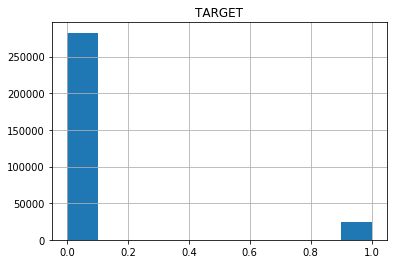

In [5]:
type(app_train['TARGET'][0])
app_train_hist = pd.DataFrame.hist(app_train, column = 'TARGET', bins = 10)

In [6]:
mis_val_perc = app_train.isnull().sum()/len(app_train)
mis_val = app_train.isnull().sum()
mis_val_table = pd.concat([mis_val,mis_val_perc], axis= 1)
mis_val_table.sort_values(by = 1, ascending = False)

,0,1
COMMONAREA_MEDI,214865,0.698723
COMMONAREA_AVG,214865,0.698723
COMMONAREA_MODE,214865,0.698723
NONLIVINGAPARTMENTS_MODE,213514,0.694330
NONLIVINGAPARTMENTS_AVG,213514,0.694330
NONLIVINGAPARTMENTS_MEDI,213514,0.694330
FONDKAPREMONT_MODE,210295,0.683862
LIVINGAPARTMENTS_MODE,210199,0.683550
LIVINGAPARTMENTS_AVG,210199,0.683550
LIVINGAPARTMENTS_MEDI,210199,0.683550


In [7]:
app_train.dtypes.value_counts()
app_train.select_dtypes('object').apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [8]:
le = LabelEncoder()
le_count = 0

for col in app_train:
    if app_train[col].dtype == 'object':
        if len(list(app_train[col].unique())) <=2:
            le.fit(app_train[col])
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            le_count += 1
print('%d columns were label encoded' % le_count)

3 columns were label encoded


In [9]:
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

In [10]:
(app_train.DAYS_BIRTH/-365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [11]:
(app_train.DAYS_EMPLOYED/-365).describe()

count    307511.000000
mean       -174.835742
std         387.056895
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5,0,'Days Employed')

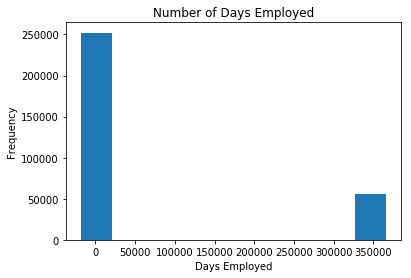

In [12]:
app_train.DAYS_EMPLOYED.plot.hist(title = 'Number of Days Employed')
plt.xlabel('Days Employed')

In [13]:
app_train[app_train['DAYS_EMPLOYED']==365243]['TARGET'].mean()

0.05399646043269404

In [14]:
app_train[app_train['DAYS_EMPLOYED']!=365243]['TARGET'].mean()

0.0865997453765215

In [15]:
len(app_train[app_train['DAYS_EMPLOYED']==365243])

55374

In [16]:
correlations = app_train.corr()['TARGET']

In [17]:
correlations.sort_values(ascending = False)

TARGET                                               1.000000
DAYS_BIRTH                                           0.078239
REGION_RATING_CLIENT_W_CITY                          0.060893
REGION_RATING_CLIENT                                 0.058899
NAME_INCOME_TYPE_Working                             0.057481
DAYS_LAST_PHONE_CHANGE                               0.055218
CODE_GENDER_M                                        0.054713
DAYS_ID_PUBLISH                                      0.051457
REG_CITY_NOT_WORK_CITY                               0.050994
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
FLAG_EMP_PHONE                                       0.045982
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_DOCUMENT_3                                      0.044346
OCCUPATION_TYPE_Laborers                             0.043019
DAYS_REGISTRATION                                    0.041975
OWN_CAR_AGE                                          0.037612
LIVE_CIT

In [18]:
app_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,0,1,0,202500.000,406597.5,24700.5,351000.0,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,0,0,0,270000.000,1293502.5,35698.5,1129500.0,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,1,1,1,0,67500.000,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,0,1,0,135000.000,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,0,1,0,121500.000,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,0
5,100008,0,0,0,1,0,99000.000,490495.5,27517.5,454500.0,...,0,0,0,0,0,0,0,0,0,0
6,100009,0,0,1,1,1,171000.000,1560726.0,41301.0,1395000.0,...,0,0,0,0,0,0,0,0,0,0
7,100010,0,0,1,1,0,360000.000,1530000.0,42075.0,1530000.0,...,0,0,0,0,0,0,0,0,0,0
8,100011,0,0,0,1,0,112500.000,1019610.0,33826.5,913500.0,...,0,0,0,0,0,0,0,0,0,0
9,100012,0,1,0,1,0,135000.000,405000.0,20250.0,405000.0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
len(app_train.isnull().sum()[app_train.isnull().sum()>0])

61

In [20]:
app_train_minus_target = app_train.drop(columns = ['SK_ID_CURR','TARGET'])

In [21]:
set(list(app_train_minus_target.dtypes))

{dtype('uint8'), dtype('int64'), dtype('float64')}

In [22]:
app_train_corr = app_train_minus_target.corr()

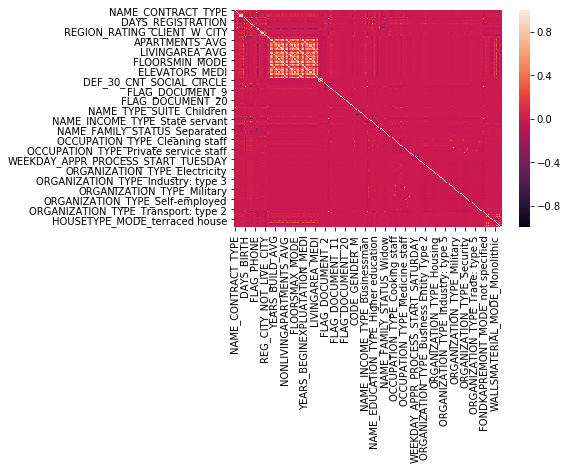

In [23]:
sns.heatmap(app_train_minus_target.corr())

In [24]:
for i in app_train_corr.columns:
    for j in app_train_corr.index:
        if (i!=j) & (app_train_corr[i][j]>=0.8):
            print(i,j,app_train_corr[i][j])            

CNT_CHILDREN CNT_FAM_MEMBERS 0.8791606404404514
AMT_CREDIT AMT_GOODS_PRICE 0.9869683054228436
AMT_GOODS_PRICE AMT_CREDIT 0.9869683054228436
DAYS_EMPLOYED NAME_INCOME_TYPE_Pensioner 0.9995337619153455
DAYS_EMPLOYED ORGANIZATION_TYPE_XNA 0.9998876799006506
CNT_FAM_MEMBERS CNT_CHILDREN 0.8791606404404514
REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY 0.9508422141600533
REGION_RATING_CLIENT_W_CITY REGION_RATING_CLIENT 0.9508422141600533
REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION 0.8606267802758127
LIVE_REGION_NOT_WORK_REGION REG_REGION_NOT_WORK_REGION 0.8606267802758127
REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY 0.8255747229651973
LIVE_CITY_NOT_WORK_CITY REG_CITY_NOT_WORK_CITY 0.8255747229651973
APARTMENTS_AVG ELEVATORS_AVG 0.8369580414057575
APARTMENTS_AVG LIVINGAPARTMENTS_AVG 0.9439521423345436
APARTMENTS_AVG LIVINGAREA_AVG 0.9136187582502617
APARTMENTS_AVG APARTMENTS_MODE 0.9732594628524119
APARTMENTS_AVG ELEVATORS_MODE 0.8225532760132033
APARTMENTS_AVG LIVINGAPARTMENT

NAME_INCOME_TYPE_Pensioner DAYS_EMPLOYED 0.9995337619153455
NAME_INCOME_TYPE_Pensioner ORGANIZATION_TYPE_XNA 0.9996475770944251
ORGANIZATION_TYPE_XNA DAYS_EMPLOYED 0.9998876799006506
ORGANIZATION_TYPE_XNA NAME_INCOME_TYPE_Pensioner 0.9996475770944251
HOUSETYPE_MODE_block of flats EMERGENCYSTATE_MODE_No 0.9150094214913587
EMERGENCYSTATE_MODE_No HOUSETYPE_MODE_block of flats 0.9150094214913587


In [25]:
column_drop = app_train_minus_target.isnull().sum()[app_train_minus_target.isnull().sum()/app_train_minus_target.shape[0] >0.2].index.tolist()

In [26]:
app_train_minus_target.drop(columns = column_drop, inplace = True)

In [27]:
for i in app_train_minus_target.isnull().sum()[app_train_minus_target.isnull().sum()>0].index:
    app_train_minus_target[i] = app_train_minus_target[i].fillna(app_train_minus_target[i].mean())

In [28]:
scaler = StandardScaler()
app_train_scaled = scaler.fit_transform(app_train_minus_target)

In [29]:
app_train_scaled = pd.DataFrame(data = app_train_scaled, columns= app_train_minus_target.columns)
app_train_scaled

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,-0.324395,-0.717914,0.664531,-0.577538,0.142129,-0.478095,-0.166149,-0.507465,-0.149452,1.506880,...,-0.062904,-0.176135,-0.086733,-0.076281,-0.072886,-0.522963,1.935056,-0.133215,0.963763,-0.087340
1,-0.324395,-0.717914,-1.504820,-0.577538,0.426792,1.725450,0.592677,1.600698,-1.252750,-0.166821,...,-0.062904,5.677469,-0.086733,-0.076281,-0.072886,-0.522963,-0.516781,-0.133215,0.963763,-0.087340
2,3.082659,1.392925,0.664531,-0.577538,-0.427196,-1.152888,-1.404676,-1.092389,-0.783451,-0.689509,...,-0.062904,-0.176135,-0.086733,-0.076281,-0.072886,-0.522963,-0.516781,-0.133215,-1.037599,-0.087340
3,-0.324395,-0.717914,0.664531,-0.577538,-0.142533,-0.711430,0.177869,-0.653696,-0.928991,-0.680114,...,-0.062904,-0.176135,-0.086733,-0.076281,-0.072886,-0.522963,-0.516781,-0.133215,-1.037599,-0.087340
4,-0.324395,-0.717914,0.664531,-0.577538,-0.199466,-0.213734,-0.361755,-0.068772,0.563570,-0.892535,...,-0.062904,-0.176135,-0.086733,-0.076281,-0.072886,-0.522963,-0.516781,-0.133215,-1.037599,-0.087340
5,-0.324395,-0.717914,0.664531,-0.577538,-0.294354,-0.269648,0.028215,-0.227189,1.078997,-0.207151,...,-0.062904,-0.176135,-0.086733,-0.076281,-0.072886,-0.522963,-0.516781,-0.133215,-1.037599,-0.087340
6,-0.324395,1.392925,0.664531,0.807273,0.009287,2.389375,0.979232,2.319667,1.078997,0.517645,...,-0.062904,-0.176135,-0.086733,-0.076281,-0.072886,-0.522963,-0.516781,-0.133215,-1.037599,-0.087340
7,-0.324395,1.392925,0.664531,-0.577538,0.806342,2.313036,1.032635,2.685244,-1.283044,-0.644596,...,-0.062904,-0.176135,-0.086733,-0.076281,-0.072886,-0.522963,-0.516781,-0.133215,-1.037599,-0.087340
8,-0.324395,-0.717914,0.664531,-0.577538,-0.237421,1.044955,0.463515,1.015774,-0.161526,-0.930803,...,-0.062904,-0.176135,-0.086733,-0.076281,-0.072886,-0.522963,-0.516781,-0.133215,-1.037599,-0.087340
9,3.082659,-0.717914,0.664531,-0.577538,-0.142533,-0.482064,-0.473219,-0.361234,-0.085250,0.359304,...,-0.062904,-0.176135,-0.086733,-0.076281,-0.072886,-0.522963,-0.516781,-0.133215,-1.037599,-0.087340


Text(0,0.5,'cumulative explained variance')

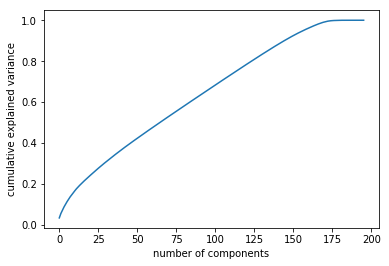

In [30]:
pca = PCA().fit(app_train_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [31]:
pca.explained_variance_ratio_

array([3.45564168e-02, 2.12985757e-02, 1.65778481e-02, 1.52912317e-02,
       1.37916481e-02, 1.28167603e-02, 1.18983968e-02, 1.14683055e-02,
       1.00800583e-02, 9.96733083e-03, 9.83500454e-03, 9.39204424e-03,
       8.36235203e-03, 7.92599142e-03, 7.63821271e-03, 7.47804302e-03,
       7.27259278e-03, 7.08829086e-03, 6.99457321e-03, 6.88895884e-03,
       6.86752977e-03, 6.84216471e-03, 6.76289635e-03, 6.72021966e-03,
       6.66216657e-03, 6.58749784e-03, 6.55645645e-03, 6.49515016e-03,
       6.30000164e-03, 6.18757956e-03, 6.14623360e-03, 6.13059163e-03,
       6.12428612e-03, 6.10635075e-03, 6.00928761e-03, 5.98217583e-03,
       5.95904640e-03, 5.89150831e-03, 5.84536177e-03, 5.80490150e-03,
       5.76138483e-03, 5.71156092e-03, 5.66829056e-03, 5.62377518e-03,
       5.59287997e-03, 5.56975930e-03, 5.49319718e-03, 5.47050569e-03,
       5.46522136e-03, 5.45094063e-03, 5.41784833e-03, 5.40458114e-03,
       5.38640632e-03, 5.37844142e-03, 5.36467135e-03, 5.35383488e-03,
      

In [32]:
pca_components = pd.DataFrame(pca.components_.T*np.sqrt(pca.explained_variance_)).T
pca_components.columns = app_train_minus_target.columns
pca_components = pca_components.T

In [33]:
pca_components

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,193,194,195
NAME_CONTRACT_TYPE,0.035671,-0.037128,-0.177584,-0.223558,0.039405,-0.084201,0.264841,-0.315029,0.133331,-0.002032,...,-7.380526e-06,-1.237256e-06,-1.534610e-28,6.982854e-31,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00
FLAG_OWN_CAR,0.257758,0.093744,0.356562,-0.046258,0.221626,-0.121037,0.163915,0.033697,0.043742,0.009776,...,-1.625078e-06,2.101727e-07,9.387777e-29,2.190828e-31,3.467370e-31,1.907410e-31,3.177231e-31,3.985380e-31,-1.204347e-31,-9.862444e-32
FLAG_OWN_REALTY,-0.120958,0.000603,0.001981,0.107336,0.102541,-0.018202,-0.040673,-0.156337,0.278123,0.193353,...,7.123108e-07,-6.297578e-08,1.142576e-29,-2.174572e-31,-6.469965e-32,5.002916e-32,7.006792e-32,7.504672e-32,-1.920905e-31,6.728379e-32
CNT_CHILDREN,0.348442,-0.081890,0.090011,0.294779,0.143628,-0.133483,0.159309,-0.370875,-0.123824,-0.214722,...,5.688181e-07,-1.183536e-07,2.056569e-14,5.658616e-19,-1.159987e-19,2.729644e-18,9.390841e-19,-2.224699e-18,9.577897e-19,-8.463913e-19
AMT_INCOME_TOTAL,0.102559,0.221652,0.144057,-0.003126,-0.034657,0.012182,0.031875,0.088905,0.051354,-0.002774,...,-1.676466e-06,5.299208e-07,-1.094131e-29,1.779193e-31,2.029089e-31,6.088656e-32,-2.047439e-32,-5.727504e-32,-5.422701e-32,9.990738e-33
AMT_CREDIT,0.127617,0.480770,0.451191,0.391469,-0.184241,0.089067,-0.169423,0.419844,-0.031411,-0.072500,...,1.585208e-05,-2.347536e-06,1.083796e-29,-5.379582e-32,7.028974e-31,5.827447e-31,6.845558e-31,5.347922e-31,8.983747e-32,-3.860226e-31
AMT_ANNUITY,0.178083,0.472249,0.437407,0.314980,-0.144989,0.076981,-0.144053,0.380737,-0.000865,-0.088224,...,-2.471287e-07,4.025550e-07,-7.544139e-30,-7.931137e-32,1.505949e-31,-5.190218e-32,1.977847e-31,2.950810e-31,4.648471e-32,-1.049451e-31
AMT_GOODS_PRICE,0.128007,0.489975,0.451085,0.385940,-0.187243,0.085187,-0.154069,0.410886,-0.024163,-0.070844,...,-2.118668e-05,3.438658e-06,4.388171e-30,2.036073e-32,-1.028884e-30,-7.107338e-31,-8.505951e-31,-6.885546e-31,-8.728246e-32,4.379764e-31
REGION_POPULATION_RELATIVE,0.017194,0.446211,0.089188,-0.182900,-0.077655,0.217184,-0.115213,-0.329132,0.011314,-0.106454,...,2.327783e-06,-4.928280e-07,6.150913e-30,-1.222756e-31,-1.048477e-31,3.542800e-32,-1.341426e-31,-6.419628e-32,5.045116e-32,1.262634e-31
DAYS_BIRTH,0.719111,-0.085140,-0.176681,-0.069040,-0.013567,-0.015817,0.189626,-0.023791,0.016517,-0.160356,...,5.914187e-05,-1.686459e-05,-1.116272e-29,6.456163e-31,1.004702e-31,9.918480e-32,-3.137726e-31,1.404505e-31,-2.241816e-32,2.793217e-34


In [34]:
type(pca_components)
for i in pca_components.columns:
    pca_components[i] = 100*(abs(pca_components[i])/abs(pca_components[i]).sum())
pca_components

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,193,194,195
NAME_CONTRACT_TYPE,0.202014,0.254033,1.227587,1.583268,0.279277,0.890198,2.027395,2.996134,1.241297,0.017651,...,0.021448,4.176293e-03,2.168870e-13,8.082356e-15,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
FLAG_OWN_CAR,1.459746,0.641405,2.464817,0.327605,1.570761,1.279638,1.254795,0.320477,0.407232,0.084935,...,0.004723,7.094270e-04,1.326778e-13,2.535790e-15,5.580994e-15,4.289014e-15,5.856622e-15,9.050630e-15,3.909826e-15,1.961926e-15
FLAG_OWN_REALTY,0.685012,0.004124,0.013695,0.760169,0.726754,0.192437,0.311355,1.486865,2.589298,1.679803,...,0.002070,2.125714e-04,1.614807e-14,2.516975e-15,1.041390e-15,1.124959e-15,1.291569e-15,1.704279e-15,6.236079e-15,1.338470e-15
CNT_CHILDREN,1.973313,0.560303,0.622218,2.087662,1.017951,1.411213,1.219533,3.527262,1.152788,1.865457,...,0.001653,3.994965e-04,2.906557e+01,6.549607e-03,1.867087e-03,6.137893e-02,1.731023e-02,5.052198e-02,3.109395e-02,1.683718e-02
AMT_INCOME_TOTAL,0.580816,1.516571,0.995825,0.022142,0.245626,0.128789,0.244011,0.845545,0.478100,0.024098,...,0.004872,1.788720e-03,1.546339e-14,2.059340e-15,3.265972e-15,1.369099e-15,3.774065e-16,1.300692e-15,1.760441e-15,1.987448e-16
AMT_CREDIT,0.722728,3.289485,3.118961,2.772431,1.305797,0.941641,1.296957,3.992991,0.292432,0.629867,...,0.046067,7.923983e-03,1.531733e-14,6.226637e-16,1.131367e-14,1.310363e-14,1.261849e-14,1.214490e-14,2.916509e-15,7.679109e-15
AMT_ANNUITY,1.008527,3.231184,3.023676,2.230728,1.027601,0.813867,1.102749,3.621059,0.008056,0.766474,...,0.000718,1.358803e-03,1.066216e-14,9.179952e-16,2.423939e-15,1.167076e-15,3.645784e-15,6.701165e-15,1.509093e-15,2.087664e-15
AMT_GOODS_PRICE,0.724937,3.352464,3.118224,2.733274,1.327074,0.900615,1.179423,3.907789,0.224954,0.615477,...,0.061570,1.160701e-02,6.201818e-15,2.356667e-16,1.656067e-14,1.598160e-14,1.567910e-14,1.563678e-14,2.833562e-15,8.712622e-15
REGION_POPULATION_RELATIVE,0.097375,3.053026,0.616534,1.295319,0.550372,2.296130,0.881974,3.130259,0.105329,0.924851,...,0.006765,1.663515e-03,8.693108e-15,1.415287e-15,1.687603e-15,7.966361e-16,2.472663e-15,1.457870e-15,1.637860e-15,2.511745e-15
DAYS_BIRTH,4.072498,0.582536,1.221344,0.488947,0.096156,0.167217,1.451619,0.226271,0.153773,1.393137,...,0.171870,5.692553e-02,1.577632e-14,7.472733e-15,1.617144e-15,2.230275e-15,5.783802e-15,3.189570e-15,7.277893e-16,5.556519e-18


In [35]:
len(pca.explained_variance_ratio_.cumsum()[pca.explained_variance_ratio_.cumsum()<=0.8])
pca_final = pca_components[pca_components.columns[pca_components.columns <=123]]
pca_final['Mean'] = pca_final.mean(axis=1)
pca_final['Mean'].sort_values(axis=0, ascending=False)
pca_final

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,0,1,2,3,4,5,6,7,8,9,...,115,116,117,118,119,120,121,122,123,Mean
NAME_CONTRACT_TYPE,0.202014,0.254033,1.227587,1.583268,0.279277,0.890198,2.027395,2.996134,1.241297,0.017651,...,0.077867,0.149266,0.055036,0.334581,0.128604,0.038487,0.490371,0.472828,0.022274,0.441948
FLAG_OWN_CAR,1.459746,0.641405,2.464817,0.327605,1.570761,1.279638,1.254795,0.320477,0.407232,0.084935,...,0.212417,0.308785,0.237403,0.141350,0.274424,0.040518,0.160610,0.151356,0.294173,0.296037
FLAG_OWN_REALTY,0.685012,0.004124,0.013695,0.760169,0.726754,0.192437,0.311355,1.486865,2.589298,1.679803,...,0.148266,0.196471,0.095838,0.107508,0.000722,0.165638,0.045272,0.409828,0.040580,0.404415
CNT_CHILDREN,1.973313,0.560303,0.622218,2.087662,1.017951,1.411213,1.219533,3.527262,1.152788,1.865457,...,0.628747,0.058434,0.560552,0.085398,0.564367,0.549488,0.022331,0.061807,0.372294,0.464127
AMT_INCOME_TOTAL,0.580816,1.516571,0.995825,0.022142,0.245626,0.128789,0.244011,0.845545,0.478100,0.024098,...,0.220742,0.555170,0.274592,0.765870,0.338180,0.006821,0.218960,1.412338,0.312058,0.349413
AMT_CREDIT,0.722728,3.289485,3.118961,2.772431,1.305797,0.941641,1.296957,3.992991,0.292432,0.629867,...,0.005161,0.037389,0.018815,0.027052,0.131567,0.099301,0.193018,0.109079,0.013148,0.298293
AMT_ANNUITY,1.008527,3.231184,3.023676,2.230728,1.027601,0.813867,1.102749,3.621059,0.008056,0.766474,...,0.057974,0.076607,0.034729,0.101234,0.104345,0.038328,0.051396,0.057814,0.051797,0.267060
AMT_GOODS_PRICE,0.724937,3.352464,3.118224,2.733274,1.327074,0.900615,1.179423,3.907789,0.224954,0.615477,...,0.008986,0.069231,0.006029,0.009341,0.119410,0.090632,0.237289,0.090492,0.006856,0.304000
REGION_POPULATION_RELATIVE,0.097375,3.053026,0.616534,1.295319,0.550372,2.296130,0.881974,3.130259,0.105329,0.924851,...,0.119127,0.029399,0.007549,0.115880,0.238916,0.057807,0.003247,0.148488,0.295525,0.261166
DAYS_BIRTH,4.072498,0.582536,1.221344,0.488947,0.096156,0.167217,1.451619,0.226271,0.153773,1.393137,...,0.131284,0.014166,0.112557,0.094751,0.078018,0.050746,0.141440,0.108400,0.107459,0.235768


In [36]:
app_train_scaled['TARGET'] = app_train['TARGET']
app_train_scaled.isnull().sum()

NAME_CONTRACT_TYPE                          0
FLAG_OWN_CAR                                0
FLAG_OWN_REALTY                             0
CNT_CHILDREN                                0
AMT_INCOME_TOTAL                            0
AMT_CREDIT                                  0
AMT_ANNUITY                                 0
AMT_GOODS_PRICE                             0
REGION_POPULATION_RELATIVE                  0
DAYS_BIRTH                                  0
DAYS_EMPLOYED                               0
DAYS_REGISTRATION                           0
DAYS_ID_PUBLISH                             0
FLAG_MOBIL                                  0
FLAG_EMP_PHONE                              0
FLAG_WORK_PHONE                             0
FLAG_CONT_MOBILE                            0
FLAG_PHONE                                  0
FLAG_EMAIL                                  0
CNT_FAM_MEMBERS                             0
REGION_RATING_CLIENT                        0
REGION_RATING_CLIENT_W_CITY       

In [37]:
X_train, X_test, y_train, y_test = train_test_split(app_train_scaled.drop(['TARGET'], axis=1), app_train_scaled['TARGET'], test_size=0.20, random_state=42)
log_regress = LogisticRegression(penalty= 'l2', dual=False, n_jobs=-1, class_weight='balanced').fit(X_train, y_train)
y_pred_train = pd.DataFrame(data = log_regress.predict_proba(X_train))
y_pred_test = pd.DataFrame(data = log_regress.predict_proba(X_test))

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


In [38]:
y_train_reset = y_train.reset_index(drop=True)
y_pred_train_reset = y_pred_train.reset_index(drop=True)
y_pred_train_reset.drop(columns=0, inplace=True)
y_pred_train_reset['y_actual'] = y_train_reset
y_pred_train_reset.columns = ["y_pred", "y_actual"]
y_pred_train_reset[y_pred_train_reset.y_pred >= y_pred_train_reset.y_pred.quantile(0.9)]['y_actual'].mean()
y_test_reset = y_test.reset_index(drop=True)
y_pred_test_reset = y_pred_test.reset_index(drop=True)
y_pred_test_reset.drop(columns=0, inplace=True)
y_pred_test_reset['y_actual'] = y_test_reset
y_pred_test_reset.columns = ["y_pred", "y_actual"]
y_pred_test_reset[y_pred_test_reset.y_pred >= y_pred_test_reset.y_pred.quantile(0.9)]['y_actual'].mean()

0.25524304991058366

In [39]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred_train_reset.y_actual,y_pred_train_reset.y_pred, pos_label=1)
metrics.auc(fpr,tpr)

0.7463072697550561

In [40]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import svm

C:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [41]:
gbc = GradientBoostingClassifier(n_estimators=250, max_depth=3, random_state=42, verbose=1).fit(X_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           0.5530            8.51m
         2           0.5469            7.98m
         3           0.5420            8.17m
         4           0.5381            8.15m
         5           0.5348            8.03m
         6           0.5321            8.07m
         7           0.5297            8.26m
         8           0.5277            8.22m
         9           0.5259            8.81m
        10           0.5245            8.99m
        20           0.5139            8.54m
        30           0.5081            8.12m
        40           0.5041            7.78m
        50           0.5015            7.29m
        60           0.4997            6.85m
        70           0.4981            6.47m
        80           0.4969            6.01m
        90           0.4959            5.60m
       100           0.4948            5.23m
       200           0.4887            1.62m


In [42]:
y_train_gbc_pred = pd.DataFrame(data = gbc.predict_proba(X_train))
y_test_gbc_pred = pd.DataFrame(data = gbc.predict_proba(X_test))
y_train_reset = y_train.reset_index(drop=True)
y_train_gbc_pred_reset = y_train_gbc_pred.reset_index(drop=True)
y_train_gbc_pred_reset.drop(columns=0, inplace=True)
y_train_gbc_pred_reset['y_actual'] = y_train_reset
y_train_gbc_pred_reset.columns = ["y_pred", "y_actual"]
y_train_gbc_pred_reset[y_train_gbc_pred_reset.y_pred >= y_train_gbc_pred_reset.y_pred.quantile(0.9)]['y_actual'].mean()

0.28437868379334175

In [43]:
y_test_reset = y_test.reset_index(drop=True)
y_test_gbc_pred_reset = y_test_gbc_pred.reset_index(drop=True)
y_test_gbc_pred_reset.drop(columns=0, inplace=True)
y_test_gbc_pred_reset['y_actual'] = y_test_reset
y_test_gbc_pred_reset.columns = ["y_pred", "y_actual"]
y_test_gbc_pred_reset[y_test_gbc_pred_reset.y_pred >= y_test_gbc_pred_reset.y_pred.quantile(0.9)]['y_actual'].mean()

0.2617460575516176

In [44]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_gbc_pred_reset.y_actual,y_test_gbc_pred_reset.y_pred, pos_label=1)
metrics.auc(fpr,tpr)

0.75101237917275

In [46]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100,100,100),activation='logistic',solver='adam',batch_size=32,learning_rate='adaptive',max_iter=250,shuffle=True,random_state=42,verbose=True,early_stopping=True).fit(X_train,y_train)

Iteration 1, loss = 0.25993058
Validation score: 0.918824
Iteration 2, loss = 0.25491090
Validation score: 0.918824
Iteration 3, loss = 0.25405718
Validation score: 0.918824
Iteration 4, loss = 0.25328943
Validation score: 0.918824
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


In [47]:
y_train_mlp_pred = pd.DataFrame(data = mlp.predict_proba(X_train))
y_test_mlp_pred = pd.DataFrame(data = mlp.predict_proba(X_test))
y_train_reset = y_train.reset_index(drop=True)
y_train_mlp_pred_reset = y_train_mlp_pred.reset_index(drop=True)
y_train_mlp_pred_reset.drop(columns=0, inplace=True)
y_train_mlp_pred_reset['y_actual'] = y_train_reset
y_train_mlp_pred_reset.columns = ["y_pred", "y_actual"]
y_train_mlp_pred_reset[y_train_mlp_pred_reset.y_pred >= y_train_mlp_pred_reset.y_pred.quantile(0.9)]['y_actual'].mean()

0.2526320068289907

In [48]:
y_test_reset = y_test.reset_index(drop=True)
y_test_mlp_pred_reset = y_test_mlp_pred.reset_index(drop=True)
y_test_mlp_pred_reset.drop(columns=0, inplace=True)
y_test_mlp_pred_reset['y_actual'] = y_test_reset
y_test_mlp_pred_reset.columns = ["y_pred", "y_actual"]
y_test_mlp_pred_reset[y_test_mlp_pred_reset.y_pred >= y_test_mlp_pred_reset.y_pred.quantile(0.9)]['y_actual'].mean()

0.24760201593236872

In [50]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_mlp_pred_reset.y_actual,y_train_mlp_pred_reset.y_pred, pos_label=1)
metrics.auc(fpr,tpr)

0.7397529905284341